In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 98% !important }<style>"))

# Analysis

In [2]:
from utilities import *
from models import *

In [3]:
import joblib

In [4]:
ble_file = "../Data/ble.csv"
ble = read_ble(ble_file)

In [5]:
pin_file = "../Data/pin.csv"
pin = read_pin(pin_file)

In [6]:
filename = "../Data/rssi5.csv"
B1 = "0117C55D14E4"

data = read_data(filename, B1)

All beacons: ['0117C55D14E4']
Selecting 0117C55D14E4


In [7]:
data[scanners] = min_max_scaling(data[scanners])

In [8]:
data.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,3219.000000,3140.000000,2388.000000,3396.000000,3168.000000,3347.000000,3461.000000,3819.000000,4928.000000,2340.000000,3180.000000,3074.000000,3378.000000,3859.000000,3303.000000,2179.000000,3539.000000
mean,0.438490,0.402463,0.354355,0.426232,0.437463,0.425197,0.421501,0.427935,0.419207,0.368105,0.387825,0.468933,0.499724,0.372234,0.420169,0.296665,0.402562
std,0.151902,0.130322,0.120450,0.142455,0.114273,0.156658,0.155481,0.146579,0.196955,0.179789,0.184707,0.130727,0.130346,0.153890,0.143028,0.135034,0.135141
min,0.050000,0.033333,0.050000,0.033333,0.050000,0.033333,0.050000,0.050000,0.033333,0.033333,0.033333,0.066667,0.066667,0.033333,0.033333,0.033333,0.033333
25%,0.333333,0.300000,0.266667,0.329167,0.366667,0.300000,0.283333,0.300000,0.283333,0.216667,0.216667,0.383333,0.416667,0.216667,0.316667,0.183333,0.300000
50%,0.466667,0.416667,0.350000,0.416667,0.450000,0.450000,0.416667,0.450000,0.416667,0.333333,0.400000,0.466667,0.500000,0.416667,0.416667,0.283333,0.416667
75%,0.533333,0.516667,0.450000,0.550000,0.533333,0.550000,0.550000,0.550000,0.516667,0.533333,0.550000,0.550000,0.600000,0.516667,0.516667,0.416667,0.516667
max,0.733333,0.616667,0.600000,0.700000,0.683333,0.750000,0.783333,0.650000,0.850000,0.700000,0.800000,0.750000,0.766667,0.633333,0.733333,0.566667,0.666667


## Train Validation Test Split

In [9]:
train, validation, test = train_validation_test_split(data)

In [10]:
train.groupby("location")[scanners].count()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
location,,,,,,,,,,,,,,,,,
V1_10,204,101,81,194,172,80,73,258,0,166,89,119,194,300,146,4,218
V1_11,49,64,74,92,117,81,60,87,110,43,55,135,123,27,38,24,78
V1_12,68,79,56,91,82,85,52,55,161,48,64,155,120,81,103,53,71
V1_13,70,139,56,108,43,88,97,109,258,10,43,118,85,84,148,12,59
V1_14,29,146,38,79,57,91,248,65,203,16,113,44,82,95,161,70,88
V1_18,53,22,49,82,40,31,28,222,2,63,35,54,55,210,23,0,157
V1_19,291,88,81,152,246,75,59,289,36,131,46,138,245,272,102,92,208
V1_20,112,110,92,73,121,83,66,80,80,32,68,86,160,15,88,23,66
V1_21,66,143,70,71,98,87,132,53,149,21,96,97,85,61,82,67,63


In [11]:
train.shape

(29797, 19)

In [12]:
validation.shape

(9933, 19)

In [13]:
test.shape

(9933, 19)

In [14]:
train.sort_values("time", inplace=True)
validation.sort_values("time", inplace=True)
test.sort_values("time", inplace=True)

In [15]:
train_rolled = train.groupby("location").rolling(30, min_periods=1).mean().reset_index()
validation_rolled = validation.groupby("location").rolling(30, min_periods=1).mean().reset_index()
test_rolled = test.groupby("location").rolling(30, min_periods=1).mean().reset_index()

In [16]:
train_rolled

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,30171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
1,V1_10,30172,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
2,V1_10,30173,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
3,V1_10,30177,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,0.566667,NaN,NaN,NaN,NaN
4,V1_10,30179,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,0.316667,0.183333,NaN,0.566667,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29792,V1_9,43166,0.433333,0.283333,0.366667,0.613333,0.483333,NaN,NaN,0.591667,NaN,0.166667,0.225000,0.561111,0.350000,0.475,NaN,0.133333,0.366667
29793,V1_9,43167,0.433333,0.283333,0.366667,0.613333,0.483333,NaN,NaN,0.622222,NaN,0.166667,0.225000,0.561111,0.350000,0.475,NaN,0.125000,0.366667
29794,V1_9,43168,0.433333,0.283333,0.366667,0.613333,0.483333,NaN,NaN,0.622222,NaN,0.166667,0.183333,0.561111,0.400000,0.475,NaN,0.125000,0.366667
29795,V1_9,43169,0.433333,0.283333,0.366667,0.613333,0.483333,NaN,NaN,0.622222,NaN,0.166667,0.183333,0.561111,0.400000,0.475,NaN,0.125000,0.366667


## Change Location to Coordinates

In [17]:
train_rolled["X"] = train_rolled["location"].apply(lambda x: pin[x]["X"])
train_rolled["Y"] = train_rolled["location"].apply(lambda x: pin[x]["Y"])

In [18]:
validation_rolled["X"] = validation_rolled["location"].apply(lambda x: pin[x]["X"])
validation_rolled["Y"] = validation_rolled["location"].apply(lambda x: pin[x]["Y"])

In [19]:
test_rolled["X"] = test_rolled["location"].apply(lambda x: pin[x]["X"])
test_rolled["Y"] = test_rolled["location"].apply(lambda x: pin[x]["Y"])

## Imputation
1. Forward fill
2. Fill NaN

In [20]:
train_imputed = train_rolled.set_index("location").groupby("location").ffill()
train_imputed.reset_index(inplace=True)

In [21]:
validation_imputed = validation_rolled.set_index("location").groupby("location").ffill()
validation_imputed.reset_index(inplace=True)

In [22]:
test_imputed = test_rolled.set_index("location").groupby("location").ffill()
test_imputed.reset_index(inplace=True)

In [23]:
for s in scanners:
    dx = train_imputed['X'] - ble[s]['X']
    dy = train_imputed['Y'] - ble[s]['Y']
    d = np.sqrt(np.square(dy) + np.square(dx))
    reg = joblib.load('../Models/linear_distance_models/{}.joblib'.format(s))
    ss = reg.predict(d.values.reshape((-1, 1)))
    train_imputed[s].fillna(pd.Series(ss), inplace=True)

In [24]:
train_imputed

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,...,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
0,V1_10,30171,0.411347,0.353837,0.305977,0.535450,0.433431,0.269984,0.265770,0.449929,...,0.306017,0.183333,0.491754,0.533585,0.365368,0.347862,0.083012,0.418071,11.17660,5.29753
1,V1_10,30172,0.411347,0.353837,0.305977,0.535450,0.433431,0.269984,0.300000,0.449929,...,0.306017,0.183333,0.491754,0.533585,0.365368,0.347862,0.083012,0.418071,11.17660,5.29753
2,V1_10,30173,0.533333,0.353837,0.305977,0.535450,0.433431,0.269984,0.300000,0.449929,...,0.306017,0.183333,0.491754,0.533585,0.365368,0.347862,0.083012,0.418071,11.17660,5.29753
3,V1_10,30177,0.533333,0.353837,0.305977,0.535450,0.433431,0.269984,0.300000,0.449929,...,0.306017,0.183333,0.491754,0.566667,0.365368,0.347862,0.083012,0.418071,11.17660,5.29753
4,V1_10,30179,0.533333,0.353837,0.305977,0.535450,0.433431,0.269984,0.300000,0.449929,...,0.316667,0.183333,0.491754,0.566667,0.365368,0.347862,0.083012,0.418071,11.17660,5.29753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29792,V1_9,43166,0.433333,0.283333,0.366667,0.613333,0.483333,0.266667,0.233333,0.591667,...,0.166667,0.225000,0.561111,0.350000,0.475000,0.400000,0.133333,0.366667,8.17867,5.28213
29793,V1_9,43167,0.433333,0.283333,0.366667,0.613333,0.483333,0.266667,0.233333,0.622222,...,0.166667,0.225000,0.561111,0.350000,0.475000,0.400000,0.125000,0.366667,8.17867,5.28213
29794,V1_9,43168,0.433333,0.283333,0.366667,0.613333,0.483333,0.266667,0.233333,0.622222,...,0.166667,0.183333,0.561111,0.400000,0.475000,0.400000,0.125000,0.366667,8.17867,5.28213
29795,V1_9,43169,0.433333,0.283333,0.366667,0.613333,0.483333,0.266667,0.233333,0.622222,...,0.166667,0.183333,0.561111,0.400000,0.475000,0.400000,0.125000,0.366667,8.17867,5.28213


In [25]:
for s in scanners:
    dx = validation_imputed['X'] - ble[s]['X']
    dy = validation_imputed['Y'] - ble[s]['Y']
    d = np.sqrt(np.square(dy) + np.square(dx))
    reg = joblib.load('../Models/linear_distance_models/{}.joblib'.format(s))
    ss = reg.predict(d.values.reshape((-1, 1)))
    validation_imputed[s].fillna(pd.Series(ss), inplace=True)

In [26]:
for s in scanners:
    dx = test_imputed['X'] - ble[s]['X']
    dy = test_imputed['Y'] - ble[s]['Y']
    d = np.sqrt(np.square(dy) + np.square(dx))
    reg = joblib.load('../Models/linear_distance_models/{}.joblib'.format(s))
    ss = reg.predict(d.values.reshape((-1, 1)))
    test_imputed[s].fillna(pd.Series(ss), inplace=True)

## Model Training

In [27]:
X_train, y_train = train_imputed[scanners].values, train_imputed[["X", "Y"]].values
X_validation, y_validation = validation_imputed[scanners].values, validation_imputed[["X", "Y"]].values
X_test, y_test = test_imputed[scanners].values, test_imputed[["X", "Y"]].values

In [28]:
model = MLPRegressor(model_type='small')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(X_train, y_train, X_validation, y_validation)

Train on 29797 samples, validate on 9933 samples
Epoch 1/1000
29797/29797 [==============================] - 2s 56us/sample - loss: 30.0820 - mae: 3.5162 - mse: 29.7550 - val_loss: 3.6480 - val_mae: 1.4761 - val_mse: 3.2194
Epoch 2/1000
29797/29797 [==============================] - 1s 44us/sample - loss: 2.7968 - mae: 1.2202 - mse: 2.3754 - val_loss: 2.2527 - val_mae: 1.0658 - val_mse: 1.8431
Epoch 3/1000
29797/29797 [==============================] - 1s 38us/sample - loss: 2.3188 - mae: 1.0727 - mse: 1.8921 - val_loss: 2.0403 - val_mae: 0.9885 - val_mse: 1.6106
Epoch 4/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 2.1600 - mae: 1.0237 - mse: 1.7308 - val_loss: 1.9072 - val_mae: 0.9494 - val_mse: 1.4760
Epoch 5/1000
29797/29797 [==============================] - 1s 32us/sample - loss: 2.0391 - mae: 0.9865 - mse: 1.6078 - val_loss: 1.8163 - val_mae: 0.9220 - val_mse: 1.3876
Epoch 6/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1

Epoch 48/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.3044 - mae: 0.7084 - mse: 0.8402 - val_loss: 1.4705 - val_mae: 0.7714 - val_mse: 1.0034
Epoch 49/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.3017 - mae: 0.7078 - mse: 0.8375 - val_loss: 1.5767 - val_mae: 0.8070 - val_mse: 1.0931
Epoch 50/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.2989 - mae: 0.7064 - mse: 0.8345 - val_loss: 1.7122 - val_mae: 0.8567 - val_mse: 1.2205
Epoch 51/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.2961 - mae: 0.7052 - mse: 0.8316 - val_loss: 1.4471 - val_mae: 0.7708 - val_mse: 0.9846
Epoch 52/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.2930 - mae: 0.7042 - mse: 0.8283 - val_loss: 1.4647 - val_mae: 0.7685 - val_mse: 0.9921
Epoch 53/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.2918 - mae: 0.7038 - mse: 0.8271 - val_loss:

29797/29797 [==============================] - 1s 31us/sample - loss: 1.1796 - mae: 0.6378 - mse: 0.7109 - val_loss: 1.3467 - val_mae: 0.7195 - val_mse: 0.8782
Epoch 96/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.1777 - mae: 0.6374 - mse: 0.7090 - val_loss: 1.3569 - val_mae: 0.7192 - val_mse: 0.8890
Epoch 97/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.1780 - mae: 0.6370 - mse: 0.7092 - val_loss: 1.3647 - val_mae: 0.7230 - val_mse: 0.9016
Epoch 98/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.1759 - mae: 0.6363 - mse: 0.7071 - val_loss: 1.3582 - val_mae: 0.7165 - val_mse: 0.8824
Epoch 99/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.1757 - mae: 0.6352 - mse: 0.7070 - val_loss: 1.5445 - val_mae: 0.7910 - val_mse: 1.0517
Epoch 100/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.1739 - mae: 0.6347 - mse: 0.7050 - val_loss: 1.3935 - val

Epoch 142/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.1284 - mae: 0.6114 - mse: 0.6590 - val_loss: 1.3113 - val_mae: 0.6974 - val_mse: 0.8354
Epoch 143/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.1285 - mae: 0.6115 - mse: 0.6591 - val_loss: 1.4470 - val_mae: 0.7617 - val_mse: 0.9983
Epoch 144/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.1269 - mae: 0.6112 - mse: 0.6576 - val_loss: 1.2889 - val_mae: 0.6887 - val_mse: 0.8165
Epoch 145/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.1268 - mae: 0.6115 - mse: 0.6574 - val_loss: 1.3007 - val_mae: 0.7005 - val_mse: 0.8277
Epoch 146/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.1259 - mae: 0.6112 - mse: 0.6565 - val_loss: 1.3687 - val_mae: 0.7276 - val_mse: 0.8847
Epoch 147/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.1237 - mae: 0.6100 - mse: 0.6543 - val

Epoch 189/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.0951 - mae: 0.5981 - mse: 0.6281 - val_loss: 1.3109 - val_mae: 0.7183 - val_mse: 0.8366
Epoch 190/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.0949 - mae: 0.5989 - mse: 0.6280 - val_loss: 1.2805 - val_mae: 0.6917 - val_mse: 0.8085
Epoch 191/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.0943 - mae: 0.5983 - mse: 0.6274 - val_loss: 1.3517 - val_mae: 0.7229 - val_mse: 0.8692
Epoch 192/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.0940 - mae: 0.5979 - mse: 0.6272 - val_loss: 1.3068 - val_mae: 0.7049 - val_mse: 0.8290
Epoch 193/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.0939 - mae: 0.5982 - mse: 0.6273 - val_loss: 1.2900 - val_mae: 0.7094 - val_mse: 0.8229
Epoch 194/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.0926 - mae: 0.5977 - mse: 0.6259 - val

Epoch 236/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.0768 - mae: 0.5917 - mse: 0.6139 - val_loss: 1.3085 - val_mae: 0.7024 - val_mse: 0.8351
Epoch 237/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.0767 - mae: 0.5919 - mse: 0.6140 - val_loss: 1.3527 - val_mae: 0.7269 - val_mse: 0.8727
Epoch 238/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.0765 - mae: 0.5925 - mse: 0.6138 - val_loss: 1.3454 - val_mae: 0.7237 - val_mse: 0.8996
Epoch 239/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.0754 - mae: 0.5916 - mse: 0.6128 - val_loss: 1.3442 - val_mae: 0.7204 - val_mse: 0.8892
Epoch 240/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.0757 - mae: 0.5916 - mse: 0.6133 - val_loss: 1.3194 - val_mae: 0.7040 - val_mse: 0.8546
Epoch 241/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.0757 - mae: 0.5918 - mse: 0.6132 - val

Epoch 283/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.0630 - mae: 0.5873 - mse: 0.6035 - val_loss: 1.2590 - val_mae: 0.6956 - val_mse: 0.7950
Epoch 284/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.0631 - mae: 0.5874 - mse: 0.6035 - val_loss: 1.3033 - val_mae: 0.6979 - val_mse: 0.8382
Epoch 285/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.0630 - mae: 0.5870 - mse: 0.6035 - val_loss: 1.2674 - val_mae: 0.6841 - val_mse: 0.8057
Epoch 286/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.0622 - mae: 0.5871 - mse: 0.6028 - val_loss: 1.2482 - val_mae: 0.6855 - val_mse: 0.7838
Epoch 287/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.0624 - mae: 0.5872 - mse: 0.6030 - val_loss: 1.2761 - val_mae: 0.6985 - val_mse: 0.8259
Epoch 288/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.0621 - mae: 0.5868 - mse: 0.6028 - val

Epoch 330/1000
29797/29797 [==============================] - 1s 32us/sample - loss: 1.0506 - mae: 0.5816 - mse: 0.5934 - val_loss: 1.3131 - val_mae: 0.7103 - val_mse: 0.8677
Epoch 331/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 1.0505 - mae: 0.5824 - mse: 0.5932 - val_loss: 1.2491 - val_mae: 0.6940 - val_mse: 0.7894
Epoch 332/1000
29797/29797 [==============================] - 1s 33us/sample - loss: 1.0503 - mae: 0.5824 - mse: 0.5931 - val_loss: 1.3502 - val_mae: 0.7188 - val_mse: 0.8775
Epoch 333/1000
29797/29797 [==============================] - 1s 34us/sample - loss: 1.0502 - mae: 0.5825 - mse: 0.5931 - val_loss: 1.2820 - val_mae: 0.6942 - val_mse: 0.8331
Epoch 334/1000
29797/29797 [==============================] - 1s 33us/sample - loss: 1.0495 - mae: 0.5815 - mse: 0.5923 - val_loss: 1.4035 - val_mae: 0.7368 - val_mse: 0.9333
Epoch 335/1000
29797/29797 [==============================] - 1s 34us/sample - loss: 1.0493 - mae: 0.5815 - mse: 0.5922 - val

Epoch 377/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 1.0185 - mae: 0.5653 - mse: 0.5616 - val_loss: 1.3121 - val_mae: 0.7355 - val_mse: 0.8443
Epoch 378/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 1.0186 - mae: 0.5655 - mse: 0.5619 - val_loss: 1.3484 - val_mae: 0.7378 - val_mse: 0.8727
Epoch 379/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 1.0183 - mae: 0.5649 - mse: 0.5616 - val_loss: 1.2168 - val_mae: 0.6769 - val_mse: 0.7558
Epoch 380/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 1.0177 - mae: 0.5654 - mse: 0.5611 - val_loss: 1.2307 - val_mae: 0.6706 - val_mse: 0.7732
Epoch 381/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 1.0167 - mae: 0.5644 - mse: 0.5601 - val_loss: 1.2120 - val_mae: 0.6749 - val_mse: 0.7588
Epoch 382/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 1.0163 - mae: 0.5647 - mse: 0.5598 - val

Epoch 424/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9916 - mae: 0.5532 - mse: 0.5350 - val_loss: 1.2504 - val_mae: 0.7016 - val_mse: 0.7998
Epoch 425/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9914 - mae: 0.5533 - mse: 0.5349 - val_loss: 1.2060 - val_mae: 0.6770 - val_mse: 0.7539
Epoch 426/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9906 - mae: 0.5526 - mse: 0.5341 - val_loss: 1.2056 - val_mae: 0.6652 - val_mse: 0.7438
Epoch 427/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9894 - mae: 0.5519 - mse: 0.5327 - val_loss: 1.2053 - val_mae: 0.6639 - val_mse: 0.7441
Epoch 428/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9886 - mae: 0.5519 - mse: 0.5319 - val_loss: 1.2556 - val_mae: 0.6829 - val_mse: 0.7874
Epoch 429/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9874 - mae: 0.5511 - mse: 0.5305 - val

Epoch 471/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9371 - mae: 0.5229 - mse: 0.4761 - val_loss: 1.1880 - val_mae: 0.6544 - val_mse: 0.7189
Epoch 472/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9359 - mae: 0.5224 - mse: 0.4747 - val_loss: 1.1564 - val_mae: 0.6457 - val_mse: 0.6993
Epoch 473/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9340 - mae: 0.5210 - mse: 0.4728 - val_loss: 1.1908 - val_mae: 0.6584 - val_mse: 0.7351
Epoch 474/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9332 - mae: 0.5212 - mse: 0.4720 - val_loss: 1.1556 - val_mae: 0.6449 - val_mse: 0.6974
Epoch 475/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9312 - mae: 0.5194 - mse: 0.4700 - val_loss: 1.1578 - val_mae: 0.6440 - val_mse: 0.6941
Epoch 476/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9312 - mae: 0.5195 - mse: 0.4699 - val

Epoch 518/1000
29797/29797 [==============================] - 1s 47us/sample - loss: 0.8974 - mae: 0.4985 - mse: 0.4359 - val_loss: 1.1322 - val_mae: 0.6248 - val_mse: 0.6646
Epoch 519/1000
29797/29797 [==============================] - 1s 49us/sample - loss: 0.8973 - mae: 0.4986 - mse: 0.4359 - val_loss: 1.1138 - val_mae: 0.6239 - val_mse: 0.6556
Epoch 520/1000
29797/29797 [==============================] - 1s 50us/sample - loss: 0.8971 - mae: 0.4987 - mse: 0.4357 - val_loss: 1.2101 - val_mae: 0.6553 - val_mse: 0.7400
Epoch 521/1000
29797/29797 [==============================] - 1s 34us/sample - loss: 0.8963 - mae: 0.4984 - mse: 0.4350 - val_loss: 1.2016 - val_mae: 0.6802 - val_mse: 0.7336
Epoch 522/1000
29797/29797 [==============================] - 1s 32us/sample - loss: 0.8954 - mae: 0.4982 - mse: 0.4340 - val_loss: 1.1512 - val_mae: 0.6486 - val_mse: 0.6864
Epoch 523/1000
29797/29797 [==============================] - 1s 40us/sample - loss: 0.8949 - mae: 0.4969 - mse: 0.4335 - val

Epoch 565/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8727 - mae: 0.4836 - mse: 0.4119 - val_loss: 1.1385 - val_mae: 0.6479 - val_mse: 0.6786
Epoch 566/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8726 - mae: 0.4840 - mse: 0.4119 - val_loss: 1.0905 - val_mae: 0.6153 - val_mse: 0.6321
Epoch 567/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8730 - mae: 0.4835 - mse: 0.4123 - val_loss: 1.0889 - val_mae: 0.6090 - val_mse: 0.6338
Epoch 568/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8720 - mae: 0.4832 - mse: 0.4113 - val_loss: 1.0781 - val_mae: 0.5962 - val_mse: 0.6149
Epoch 569/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8714 - mae: 0.4829 - mse: 0.4107 - val_loss: 1.1250 - val_mae: 0.6189 - val_mse: 0.6674
Epoch 570/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8714 - mae: 0.4830 - mse: 0.4108 - val

Epoch 612/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8594 - mae: 0.4758 - mse: 0.4002 - val_loss: 1.0801 - val_mae: 0.5922 - val_mse: 0.6180
Epoch 613/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8593 - mae: 0.4762 - mse: 0.3999 - val_loss: 1.1364 - val_mae: 0.6188 - val_mse: 0.6661
Epoch 614/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8598 - mae: 0.4762 - mse: 0.4005 - val_loss: 1.0540 - val_mae: 0.5830 - val_mse: 0.5918
Epoch 615/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8589 - mae: 0.4754 - mse: 0.3997 - val_loss: 1.1422 - val_mae: 0.6226 - val_mse: 0.6677
Epoch 616/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8590 - mae: 0.4759 - mse: 0.3999 - val_loss: 1.1121 - val_mae: 0.6211 - val_mse: 0.6425
Epoch 617/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8583 - mae: 0.4757 - mse: 0.3992 - val

Epoch 659/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8507 - mae: 0.4713 - mse: 0.3934 - val_loss: 1.1156 - val_mae: 0.6278 - val_mse: 0.6484
Epoch 660/1000
29797/29797 [==============================] - 1s 32us/sample - loss: 0.8507 - mae: 0.4716 - mse: 0.3934 - val_loss: 1.1104 - val_mae: 0.6050 - val_mse: 0.6464
Epoch 661/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8510 - mae: 0.4712 - mse: 0.3938 - val_loss: 1.1312 - val_mae: 0.6195 - val_mse: 0.6607
Epoch 662/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8505 - mae: 0.4712 - mse: 0.3934 - val_loss: 1.1107 - val_mae: 0.6238 - val_mse: 0.6417
Epoch 663/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8510 - mae: 0.4717 - mse: 0.3938 - val_loss: 1.0480 - val_mae: 0.5882 - val_mse: 0.5873
Epoch 664/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8503 - mae: 0.4719 - mse: 0.3932 - val

Epoch 706/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8387 - mae: 0.4641 - mse: 0.3823 - val_loss: 1.0278 - val_mae: 0.5768 - val_mse: 0.5747
Epoch 707/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8380 - mae: 0.4639 - mse: 0.3816 - val_loss: 1.0153 - val_mae: 0.5655 - val_mse: 0.5613
Epoch 708/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8376 - mae: 0.4628 - mse: 0.3811 - val_loss: 1.0174 - val_mae: 0.5698 - val_mse: 0.5614
Epoch 709/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8381 - mae: 0.4636 - mse: 0.3817 - val_loss: 1.1140 - val_mae: 0.6135 - val_mse: 0.6416
Epoch 710/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8370 - mae: 0.4629 - mse: 0.3806 - val_loss: 1.0136 - val_mae: 0.5659 - val_mse: 0.5618
Epoch 711/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8367 - mae: 0.4627 - mse: 0.3803 - val

Epoch 753/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8235 - mae: 0.4546 - mse: 0.3671 - val_loss: 1.0798 - val_mae: 0.6141 - val_mse: 0.6182
Epoch 754/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8243 - mae: 0.4549 - mse: 0.3679 - val_loss: 0.9960 - val_mae: 0.5594 - val_mse: 0.5444
Epoch 755/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8226 - mae: 0.4543 - mse: 0.3664 - val_loss: 1.0485 - val_mae: 0.5785 - val_mse: 0.5886
Epoch 756/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8234 - mae: 0.4544 - mse: 0.3671 - val_loss: 1.0290 - val_mae: 0.5667 - val_mse: 0.5639
Epoch 757/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8226 - mae: 0.4538 - mse: 0.3663 - val_loss: 1.0063 - val_mae: 0.5659 - val_mse: 0.5565
Epoch 758/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8229 - mae: 0.4543 - mse: 0.3666 - val

Epoch 800/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8071 - mae: 0.4451 - mse: 0.3510 - val_loss: 1.0857 - val_mae: 0.6100 - val_mse: 0.6158
Epoch 801/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8067 - mae: 0.4451 - mse: 0.3507 - val_loss: 0.9909 - val_mae: 0.5574 - val_mse: 0.5406
Epoch 802/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8063 - mae: 0.4448 - mse: 0.3502 - val_loss: 1.0498 - val_mae: 0.5844 - val_mse: 0.5798
Epoch 803/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8056 - mae: 0.4441 - mse: 0.3495 - val_loss: 1.0881 - val_mae: 0.5965 - val_mse: 0.6170
Epoch 804/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8049 - mae: 0.4442 - mse: 0.3489 - val_loss: 1.0555 - val_mae: 0.5966 - val_mse: 0.6158
Epoch 805/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8051 - mae: 0.4444 - mse: 0.3491 - val

Epoch 847/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.7948 - mae: 0.4381 - mse: 0.3395 - val_loss: 1.0628 - val_mae: 0.5873 - val_mse: 0.5907
Epoch 848/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.7939 - mae: 0.4377 - mse: 0.3385 - val_loss: 0.9663 - val_mae: 0.5367 - val_mse: 0.5082
Epoch 849/1000
29797/29797 [==============================] - 1s 34us/sample - loss: 0.7939 - mae: 0.4378 - mse: 0.3386 - val_loss: 1.0132 - val_mae: 0.5635 - val_mse: 0.5457
Epoch 850/1000
29797/29797 [==============================] - 1s 34us/sample - loss: 0.7934 - mae: 0.4375 - mse: 0.3381 - val_loss: 0.9837 - val_mae: 0.5506 - val_mse: 0.5283
Epoch 851/1000
29797/29797 [==============================] - 1s 34us/sample - loss: 0.7930 - mae: 0.4374 - mse: 0.3378 - val_loss: 0.9674 - val_mae: 0.5423 - val_mse: 0.5126
Epoch 852/1000
29797/29797 [==============================] - 1s 33us/sample - loss: 0.7931 - mae: 0.4367 - mse: 0.3378 - val

Epoch 894/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7844 - mae: 0.4323 - mse: 0.3305 - val_loss: 1.0640 - val_mae: 0.5914 - val_mse: 0.5931
Epoch 895/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7851 - mae: 0.4329 - mse: 0.3311 - val_loss: 0.9695 - val_mae: 0.5480 - val_mse: 0.5242
Epoch 896/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7837 - mae: 0.4322 - mse: 0.3298 - val_loss: 0.9755 - val_mae: 0.5492 - val_mse: 0.5184
Epoch 897/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7843 - mae: 0.4328 - mse: 0.3303 - val_loss: 0.9502 - val_mae: 0.5265 - val_mse: 0.4926
Epoch 898/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7837 - mae: 0.4320 - mse: 0.3298 - val_loss: 0.9597 - val_mae: 0.5394 - val_mse: 0.5114
Epoch 899/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7844 - mae: 0.4325 - mse: 0.3306 - val

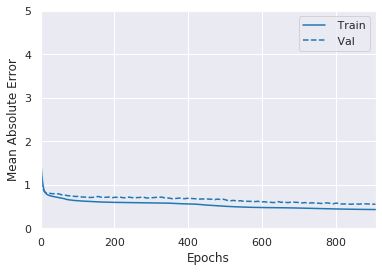

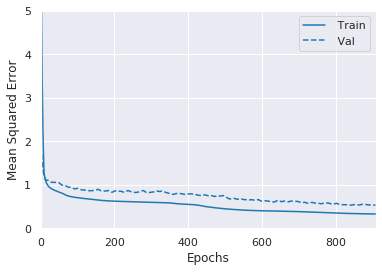

In [30]:
model.show_history()

## Model Validation

9933/1 - 0s - loss: 0.5996 - mae: 0.5621 - mse: 0.5424
Validation loss: 0.9903611782831355
Mean absolute error: 0.56207836
Mean squared error: 0.5424454
Average distance error: 0.8758705146294454


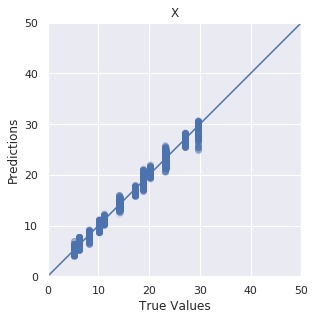

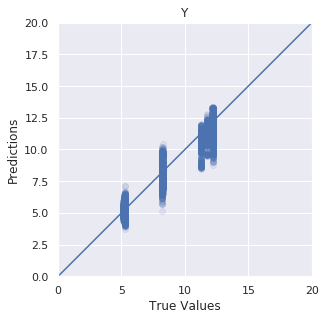

In [31]:
model.model_validation(X_validation, y_validation)

## Model Testing

9933/1 - 0s - loss: 0.6699 - mae: 0.5580 - mse: 0.5413
Test loss: 0.9864275665768297
Mean absolute error: 0.5580328
Mean squared error: 0.5412545
Average distance error: 0.8737403860154627


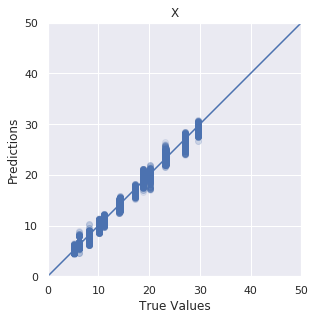

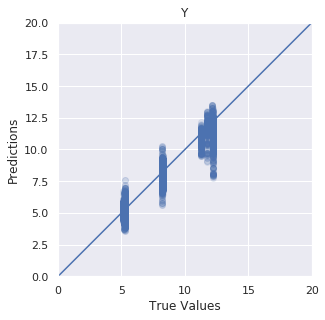

In [32]:
model.model_testing(X_test, y_test)

In [33]:
model.save('../Models/Small_MLP_Regression_Rolling_FFill_MinMax_LinearDistanceModel.h5')

In [34]:
prev_model = MLPRegressor(model_type='small')
prev_model.load('../Models/Small_MLP_Regression_Rolling_FFill_MinMax.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                1152      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [35]:
y_test[10]

array([11.1766 ,  5.29753])

In [36]:
X_test[10:11]

array([[0.51666667, 0.23333333, 0.30597734, 0.3       , 0.43343111,
        0.26998357, 0.28333333, 0.26666667, 0.14828919, 0.30833333,
        0.16605818, 0.41666667, 0.58333333, 0.4       , 0.4       ,
        0.08301237, 0.41807056]])

In [37]:
loc = prev_model.predict(X_test[110:111])
loc

array([[10.565965,  6.218649]], dtype=float32)

In [38]:
test_imputed

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,...,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
0,V1_10,30174,0.411347,0.353837,0.305977,0.535450,0.433431,0.269984,0.265770,0.266667,...,0.306017,0.166058,0.491754,0.533585,0.416667,0.347862,0.083012,0.418071,11.17660,5.29753
1,V1_10,30175,0.411347,0.353837,0.305977,0.535450,0.433431,0.269984,0.265770,0.266667,...,0.306017,0.166058,0.491754,0.566667,0.416667,0.347862,0.083012,0.418071,11.17660,5.29753
2,V1_10,30186,0.411347,0.353837,0.305977,0.535450,0.433431,0.269984,0.265770,0.266667,...,0.306017,0.166058,0.491754,0.566667,0.416667,0.400000,0.083012,0.418071,11.17660,5.29753
3,V1_10,30192,0.411347,0.353837,0.305977,0.535450,0.433431,0.269984,0.265770,0.266667,...,0.306017,0.166058,0.491754,0.591667,0.416667,0.400000,0.083012,0.418071,11.17660,5.29753
4,V1_10,30193,0.411347,0.353837,0.305977,0.535450,0.433431,0.269984,0.265770,0.266667,...,0.306017,0.166058,0.416667,0.591667,0.416667,0.400000,0.083012,0.418071,11.17660,5.29753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9928,V1_9,43145,0.466667,0.400000,0.300000,0.627778,0.466667,0.233333,0.133333,0.620833,...,0.150000,0.116667,0.564583,0.441667,0.455556,0.441667,0.150000,0.433333,8.17867,5.28213
9929,V1_9,43148,0.466667,0.400000,0.300000,0.629167,0.466667,0.233333,0.133333,0.620833,...,0.150000,0.116667,0.569048,0.441667,0.455556,0.441667,0.150000,0.433333,8.17867,5.28213
9930,V1_9,43149,0.466667,0.400000,0.300000,0.629167,0.466667,0.233333,0.133333,0.620833,...,0.150000,0.116667,0.561905,0.441667,0.455556,0.441667,0.150000,0.433333,8.17867,5.28213
9931,V1_9,43155,0.466667,0.400000,0.300000,0.629167,0.466667,0.233333,0.133333,0.620000,...,0.150000,0.116667,0.561905,0.441667,0.455556,0.444444,0.150000,0.433333,8.17867,5.28213


In [39]:
t = test_imputed[10:11].copy().reset_index(drop=True)

In [40]:
for s in scanners:
    dx = t['X'] - ble[s]['X']
    dy = t['Y'] - ble[s]['Y']
    d = np.sqrt(np.square(dy) + np.square(dx))
    reg = joblib.load('../Models/linear_distance_models/{}.joblib'.format(s))
    ss = reg.predict(d.values.reshape((-1, 1)))
    t[s] = t[s].fillna(pd.Series(ss))

In [41]:
t

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,...,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
0,V1_10,30207,0.516667,0.233333,0.305977,0.3,0.433431,0.269984,0.283333,0.266667,...,0.308333,0.166058,0.416667,0.583333,0.4,0.4,0.083012,0.418071,11.1766,5.29753


In [42]:
model.predict(t[scanners])

array([[11.426297,  6.252144]], dtype=float32)